<a href="https://colab.research.google.com/github/evaterry4/DS3001_project/blob/main/Train_Test_Split_pt2%2BLASSO_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
!git clone https://github.com/evaterry4/DS3001_project.git

fatal: destination path 'DS3001_project' already exists and is not an empty directory.


In [200]:
import pandas as pd
data = pd.read_csv("DS3001_project/college_data_clean.csv")

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
data.head()

,id,name,zip,city,state,acceptance_rate,part_time,debt,degree_type,pell_grant,...,percent_loans,graduation_rate,yearly_cost,student_pop,earnings,school_type,region,average_act,precent_female,average_income
0,100654,Alabama A & M University,35762,Normal,AL,0.6840,0.0778,31000,3,0.6553,...,0.5365,0.2678,23167.0,5196.0,46562.0,Public,5,18.0,0.5640301318,32362.826114
1,100663,University of Alabama at Birmingham,35294-0110,Birmingham,AL,0.8668,0.1986,22300,3,0.3374,...,0.4214,0.6442,26257.0,12776.0,52404.0,Public,5,27.0,0.6390907397,51306.674306
2,100690,Amridge University,36117-3553,Montgomery,AL,NaN,0.4342,32189,3,0.7769,...,0.5896,0.5000,NaN,228.0,45765.0,Private Nonprofit,5,NaN,0.6486486486,21079.472973
3,100706,University of Alabama in Huntsville,35899,Huntsville,AL,0.7810,0.1612,20705,3,0.2235,...,0.3511,0.6295,25777.0,6985.0,67695.0,Public,5,28.0,0.4763499372,61096.588949
4,100724,Alabama State University,36104-0271,Montgomery,AL,0.9660,0.0771,31000,3,0.6984,...,0.768,0.2773,21900.0,3296.0,37551.0,Public,5,18.0,0.6134185304,31684.382188


In [203]:
nan_count = data.isna().sum()
print(nan_count)

id                    0
name                  0
zip                   0
city                  0
state                 0
acceptance_rate     375
part_time             4
debt                 27
degree_type           0
pell_grant           14
stud_fac_ratio        3
percent_loans        14
graduation_rate     143
yearly_cost         168
student_pop           0
earnings            182
school_type           5
region                0
average_act        1044
precent_female       64
average_income       64
dtype: int64


 Going to get rid of NaN's in acceptance_rate because according to data dictionary they are there becasue school with fewer then 30 students either do not report that info or the dept of education choose to not include it becase it would "dramatically change the rate"

Also getting rid of NaN's in average_act and yearly_cost cause based off data dictionary they are there cause school chose not to report the score.


In [204]:
#print(data['graduation_rate'])

In [205]:
#print(data['average_act'])

In [206]:
#print(data['yearly_cost'])

id
name
zip	city
state
acceptance_rate
part_time
debt
degree_type
pell_grant
stud_fac_ratio
percent_loans
graduation_rate
yearly_cost
student_pop
earnings
school_type	region
average_act
precent_female
average_income

In [207]:
data.columns

Index(['id', 'name', 'zip', 'city', 'state', 'acceptance_rate', 'part_time',
       'debt', 'degree_type', 'pell_grant', 'stud_fac_ratio', 'percent_loans',
       'graduation_rate', 'yearly_cost', 'student_pop', 'earnings',
       'school_type', 'region', 'average_act', 'precent_female',
       'average_income'],
      dtype='object')

In [208]:
#clean the reigon variable based on the data dictionary
region_mapping = {
    0: 'US-service-schools',
    1: 'new-england',
    2: 'mid-east',
    3: 'great-lakes',
    4: 'plains',
    5: 'southeast',
    6: 'southwest',
    7: 'rocky-mountains',
    8: 'far-west'
}

# Map the region codes to region names in the DataFrame
data['region'] = data['region'].map(region_mapping)

In [209]:
data_clean = data.dropna()
y = data_clean['graduation_rate']

# I belive we have to one-hot encode region before the train test split
df = pd.get_dummies(data_clean[['region', 'acceptance_rate', 'pell_grant','stud_fac_ratio','percent_loans','average_act', 'average_income']],
                   columns=['region'],
                   drop_first=False)  # Keep all categories for interpretability

# Split the sample:
from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test = train_test_split(df, y,
                                                    test_size=.2,
                                                    random_state=100)

In [210]:
from sklearn import linear_model
#ols model with all the variables

reg = linear_model.LinearRegression(fit_intercept=False).fit(df_train,y_train)


y_hat = reg.predict(df_test)

r2_score = reg.score(df_test, y_test)
print(f"R squared score: {r2_score}")

rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print(f"RMSE: {rmse}")

results = pd.DataFrame({'Variable': reg.feature_names_in_, 'Coefficient': reg.coef_})
print(results)

R squared score: 0.7551833769248124
RMSE: 0.08354508634420854
                     Variable  Coefficient
0             acceptance_rate    -0.093258
1                  pell_grant    -0.235818
2              stud_fac_ratio     0.000511
3               percent_loans    -0.040241
4                 average_act     0.016737
5              average_income     0.000002
6   region_US-service-schools     0.197348
7             region_far-west     0.273706
8          region_great-lakes     0.234844
9             region_mid-east     0.246210
10         region_new-england     0.221060
11              region_plains     0.216125
12     region_rocky-mountains     0.180851
13           region_southeast     0.221600
14           region_southwest     0.210359


In [211]:
from sklearn import linear_model
#lasso
# Scale data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_train)
X_sc = scaler.transform(df_train)

# Run LASSO:
reg = linear_model.Lasso(alpha=0.01,
                         warm_start=True,
                         max_iter=10000000,
                         fit_intercept=True)
reg.fit(X_sc,y_train)

sdf = pd.DataFrame({'variable': df_train.columns, 'slope':reg.coef_})
sdf

#drop stud_fac_ratio, percent_loans

,variable,slope
0,acceptance_rate,-0.011781
1,pell_grant,-0.026522
2,stud_fac_ratio,-0.000000
3,percent_loans,-0.000000
4,average_act,0.078347
5,average_income,0.037258
6,region_US-service-schools,0.000000
7,region_far-west,0.002067
8,region_great-lakes,0.000000
9,region_mid-east,0.000000


In [212]:
#model using variables selected by lasso
#I used ai to figure out how to add the catagorical variable to my new x_train/test while keeping the original split
x_train_lasso = df_train[['acceptance_rate', 'pell_grant','average_act', 'average_income'] + [col for col in df_train.columns if col.startswith('region_')]]  # Include one-hot encoded region columns
x_test_lasso = df_test[['acceptance_rate', 'pell_grant','average_act', 'average_income'] + [col for col in df_test.columns if col.startswith('region_')]]

reg = linear_model.LinearRegression(fit_intercept=False).fit(x_train_lasso,y_train)


y_hat = reg.predict(x_test_lasso)

r2_score = reg.score(x_test_lasso, y_test)
print(f"R squared score: {r2_score}")

rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print(f"RMSE: {rmse}")

results = pd.DataFrame({'Variable': reg.feature_names_in_, 'Coefficient': reg.coef_})
print(results)

R squared score: 0.7527846757702866
RMSE: 0.08395337399671907
                     Variable  Coefficient
0             acceptance_rate    -0.096003
1                  pell_grant    -0.264974
2                 average_act     0.017463
3              average_income     0.000002
4   region_US-service-schools     0.201144
5             region_far-west     0.266754
6          region_great-lakes     0.226080
7             region_mid-east     0.237315
8          region_new-england     0.212727
9               region_plains     0.208001
10     region_rocky-mountains     0.177565
11           region_southeast     0.215412
12           region_southwest     0.207249


In [213]:
#second model using lasso (drop reigon also because most reigons not selected)

x_train_lasso2 = df_train[['acceptance_rate', 'pell_grant','average_act', 'average_income']]
x_test_lasso2 = df_test[['acceptance_rate', 'pell_grant','average_act', 'average_income']]

reg = linear_model.LinearRegression(fit_intercept=False).fit(x_train_lasso2,y_train)


# This line should be changed to use x_test_lasso to predict on the test set
y_hat = reg.predict(x_test_lasso2)

r2_score = reg.score(x_test_lasso2, y_test)
print(f"R squared score: {r2_score}")

rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print(f"RMSE: {rmse}")

results = pd.DataFrame({'Variable': reg.feature_names_in_, 'Coefficient': reg.coef_})
print(results)

R squared score: 0.7657546362257236
RMSE: 0.08172143096604254
          Variable  Coefficient
0  acceptance_rate    -0.055047
1       pell_grant    -0.121575
2      average_act     0.022091
3   average_income     0.000002


PCA

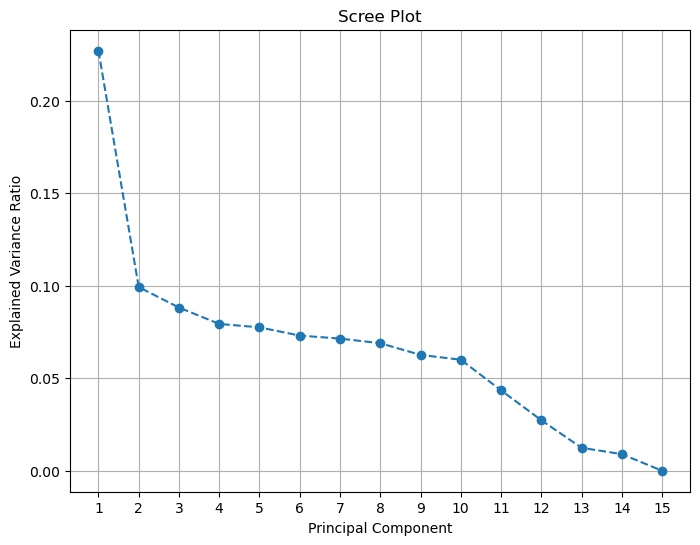

Number of components to retain for 95.0% explained variance: 11
Mean Squared Error: 0.006979781452264175
R-squared: 0.7551833769247102

Model Coefficients (Relationship between Principal Components and Graduation Rate):
       Coefficient
PC1   7.895259e-02
PC2   3.177807e-03
PC3  -6.130791e-03
PC4  -5.653642e-05
PC5  -6.744100e-03
PC6   5.650020e-03
PC7  -4.605538e-03
PC8   1.712538e-03
PC9  -1.523824e-02
PC10  1.888818e-02
PC11 -1.311228e-02
PC12  1.516874e-02
PC13  3.164044e-02
PC14  5.569860e-03
PC15  1.037606e-17


In [216]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt

data_clean = data.dropna()
y = data_clean['graduation_rate']

df = pd.get_dummies(data_clean[['region', 'acceptance_rate', 'pell_grant','stud_fac_ratio','percent_loans','average_act', 'average_income']],
                   columns=['region'],
                   drop_first=False)  # Keep all categories for interpretability

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y,
                                                    test_size=.2,
                                                    random_state=100)
# using standard z-scale since PCA works best with scaled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA()
pca.fit(X_train_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

# making the screen plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(range(1, len(explained_variance_ratio) + 1))  # Ensure each principal component is labeled
plt.grid(True)
plt.show()
threshold = 0.95
n_components_to_retain = np.argmax(np.cumsum(explained_variance_ratio) >= threshold) + 1
print(f"Number of components to retain for {threshold*100}% explained variance: {n_components_to_retain}")


X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
model = LinearRegression()
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

coefficients = model.coef_
coefficients_df = pd.DataFrame(coefficients, index=[f'PC{i+1}' for i in range(len(coefficients))], columns=['Coefficient'])
print("\nModel Coefficients (Relationship between Principal Components and Graduation Rate):")
print(coefficients_df)

After applying PCA and using a linear regression model, we want to translate the results back to our features to determine which features contribute most to each component. To do this, we will make a pandas data frame and get the feature that contributes most to each component (has the greatest load).

In [217]:
coefficients_df = pd.DataFrame(coefficients, index=[f'PC{i+1}' for i in range(len(coefficients))], columns=['Coefficient'])
print("\nModel Coefficients (Relationship between Principal Components and Graduation Rate):")
print(coefficients_df)
components_df = pd.DataFrame(pca.components_, columns=X_train.columns)
print("\nPrincipal Component Loadings (Relationship between Features and Principal Components):")
print(components_df)
abs_components_df = components_df.abs()
top_contributors = abs_components_df.apply(lambda x: x.idxmax(), axis=1) 
top_feature_loadings = abs_components_df.max(axis=1)  

top_contributors_df = pd.DataFrame({'Feature': top_contributors, 'Loading': top_feature_loadings})
print("\nTop Contributing Features for Each Principal Component:")
print(top_contributors_df)


Model Coefficients (Relationship between Principal Components and Graduation Rate):
       Coefficient
PC1   7.895259e-02
PC2   3.177807e-03
PC3  -6.130791e-03
PC4  -5.653642e-05
PC5  -6.744100e-03
PC6   5.650020e-03
PC7  -4.605538e-03
PC8   1.712538e-03
PC9  -1.523824e-02
PC10  1.888818e-02
PC11 -1.311228e-02
PC12  1.516874e-02
PC13  3.164044e-02
PC14  5.569860e-03
PC15  1.037606e-17

Principal Component Loadings (Relationship between Features and Principal Components):
    acceptance_rate    pell_grant  stud_fac_ratio  percent_loans  \
0     -3.196923e-01 -4.662035e-01   -1.909794e-01  -2.679990e-01   
1     -2.971106e-01  4.795168e-02    2.445889e-01  -4.880668e-01   
2      2.353109e-01 -1.693782e-01    3.934809e-01  -2.705711e-01   
3      9.093460e-02  5.454923e-02    1.075375e-01   1.842372e-03   
4     -1.178428e-02 -5.711085e-02   -1.035937e-01   7.313315e-03   
5      1.683981e-01 -4.830429e-02   -6.792594e-02  -8.395840e-02   
6      1.240580e-01 -9.322393e-02    1.906197e-

Interpretation of PCA results: 

Based on the scree plot, there is an elbow at 2 components. We also know that 95% of the data can be explained by 11 components. The first two components are most heavily contributed to by average ACT and percent loans. Components 2-8 are most affected by region. From this model, we can determine that the percent of loans, average ACT, and school region best predict graduation rate among the studied factors. 
